In [1]:
import os

import numpy as np
from matplotlib import pyplot as plt
import keras

/home/cjw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
datadir = '/media/cjw/Data/MNIST/'

In [3]:
mms = os.listdir(datadir)
mms = [x for x in mms if x.endswith(".mm")]
mms

['mnist.mm']

In [4]:
label_file ='/media/cjw/Data/MNIST/train-labels-idx1-ubyte'
labmm = np.memmap(label_file, dtype=np.uint8, mode='r', offset=8, shape=(60000))
labels = np.zeros((60000))
labels[:] = labmm

y = np.zeros((len(labels), 10), dtype=np.float32)
print(y.shape, labels.shape)
for i, b in enumerate(labels):
#     print(i,b)
    y[i, int(b)] = 1
    


(60000, 10) (60000,)


In [5]:
header = np.memmap(datadir + mms[0][0:128], dtype=np.int32, shape=(4,))
header

memmap([60000,    28,    28,     1], dtype=int32)

In [6]:
del header

In [33]:
images = np.memmap(datadir + mms[0], offset=128, dtype=np.float32, shape=(60000, 28,28, 1))
train = images[:40000]
yt = y[0:40000]

In [34]:
datagen = keras.preprocessing.image.ImageDataGenerator(data_format='channels_last')
datagen.fit(train)

(28, 28, 1) (32, 28, 28, 1)
1.0


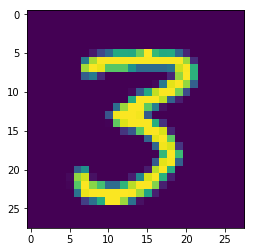

In [35]:
for x in datagen.flow(train, batch_size=32):
    print(x[0].shape, x.shape)
    print(np.max(x))
    plt.imshow(x[0,:,:,0])
    break;

In [36]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Conv2DTranspose, Activation, Flatten

model = Sequential()
model.add(Conv2D(16, 3, strides=2, padding='SAME', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Conv2D(32, 3, strides=2, padding='SAME'))
model.add(Activation('relu'))
model.add(Conv2D(64, 1, strides=1, padding='SAME'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit_generator(datagen.flow(train, yt, batch_size=128),
                    steps_per_epoch=40000/128, epochs=10,
                   validation_data=(images[40000:50000], y[40000:50000]),
                    validation_steps=10000/128)





Epoch 1/10
313/312 [==============================] - 3s 10ms/step - loss: 0.2766 - acc: 0.9189 - val_loss: 0.1169 - val_acc: 0.9617
Epoch 2/10
313/312 [==============================] - 3s 8ms/step - loss: 0.0821 - acc: 0.9757 - val_loss: 0.0887 - val_acc: 0.9722
Epoch 3/10
313/312 [==============================] - 3s 8ms/step - loss: 0.0591 - acc: 0.9820 - val_loss: 0.0773 - val_acc: 0.9752
Epoch 4/10
313/312 [==============================] - 3s 8ms/step - loss: 0.0459 - acc: 0.9856 - val_loss: 0.0748 - val_acc: 0.9767
Epoch 5/10
313/312 [==============================] - 3s 8ms/step - loss: 0.0369 - acc: 0.9884 - val_loss: 0.0719 - val_acc: 0.9792
Epoch 6/10
313/312 [==============================] - 3s 8ms/step - loss: 0.0306 - acc: 0.9902 - val_loss: 0.0703 - val_acc: 0.9795
Epoch 7/10
313/312 [==============================] - 3s 8ms/step - loss: 0.0264 - acc: 0.9911 - val_loss: 0.0747 - val_acc: 0.9776
Epoch 8/10
313/312 [==============================] - 3s 8ms/step - loss: 0

(1, 28, 28, 1)


(0.99390256, 1, 1)

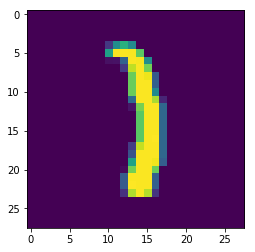

In [136]:
n += 1
v = np.expand_dims(images[n], axis=0)
print(v.shape)
g = model.predict(v)
plt.imshow(images[n,:,:,0])
np.max(g), np.argmax(g), np.argmax(y[n])


In [128]:
print(g)

[[4.3746414e-07 4.5686069e-01 4.6503875e-01 2.3336004e-07 3.0365724e-11
  3.9287217e-05 7.7974118e-02 2.0790188e-10 8.6496730e-05 5.0593606e-16]]
